<a href="https://colab.research.google.com/github/orizay/free-fonts/blob/master/%EB%A7%88%EC%BC%80%ED%8C%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Acquisition]세일즈 데이터 분석 마케팅 미그 모델링

##  분석할 데이터 파악:미디어별 광고비 EDA

### STEP 1:
- 미디어별 광고비 EDA

### STEP 2:
- 분석 모델링 매체비로 세일즈 예측

### STEP 3:
- 분석 결과 해석 적용 방안

# **세이즈 데이터 분석을 통한 마케팅 믹스 모델링**
- 미디어별 광고비와 세일즈 데이터를 가지고 최적의 마케팅 믹스를 구해봅시다.


- 데이터 설멸:(https://www.kaggle.com/sazid28/advertising.csv/)
  - TV - TV메체비 입니다.
  - Radio - 라디오 매체비 입니다.
  - Newspaper - 신문 매체비 입니다.
  - Sales - 매출액 입니다.

## 문제 정의
- 전제
  - 실제로는 광고 매체비 이와의 많은 요인이 매출에 영향을 미칩니다.(e.g.영업인력수,입소문,경기,유행 등)
  - 본 분석에서는 다른 요인이 모두 동일한 상황에서 매체비만 변경했을 때 매출액의 변화가 발생한 것이라고 간주해봅니다.
  - 실제로 Acquisition단계에서는 종속변수가 매출액보다는 방문자수,가입자수,DAU,MAU등의 지표가 될 것입니다.


- 분석의 목적
  - 각 미디어별로 매체비를 어떻게 쓰느냐에 따라서 매출액이 어떻게 달라질지 예측합니다.
  - 궁극적으로는 매출액을 최대화할 수 있는 미디어 믹스의 구성을 도출합니다.
  - 이 미디어믹스는 향후 미디어 플랜을 수립할 때 사용될 수 있습니다.

# 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# 데이터를 확인합니다
df = pd.read_csv('/content/drive/My Drive/MyData/Advertising.csv')
print(df.shape)
df.tail()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
# 결측값이 있는지 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# 분석에 필요한 컬럼만 선택합니다.
df = df[['TV','radio','newspaper','sales']].copy()
print(df.shape)
df.tail()

(200, 4)


,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
# 기술통계를 확인합니다.
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


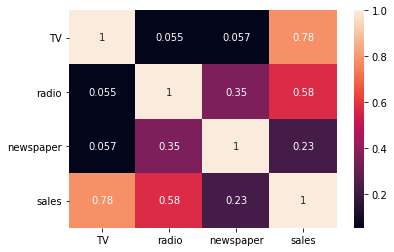

In [7]:
# 변수간의 correlation을 확인합니다.
corr = df.corr()
sns.heatmap(corr,annot=True)

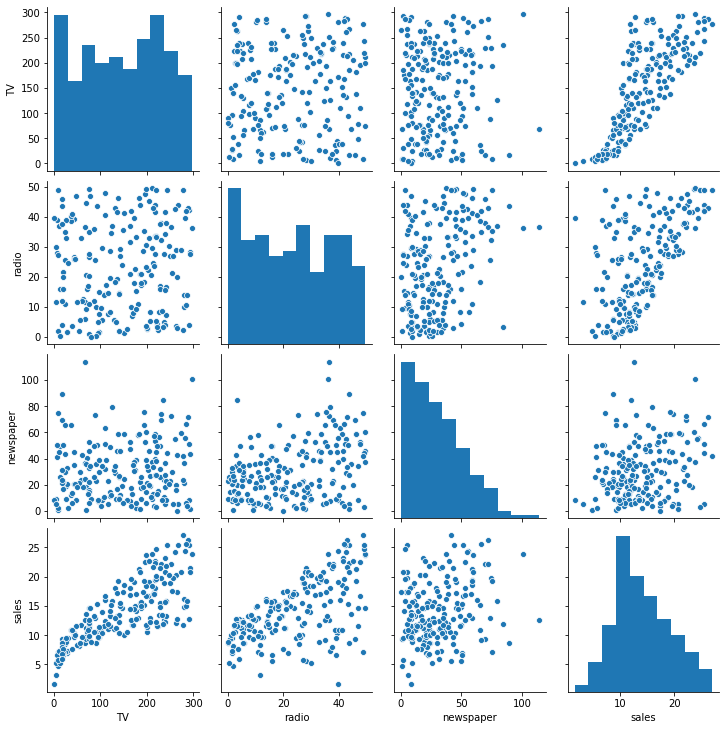

In [8]:
# 변수간의 pairplot을 그려봅니다.
sns.pairplot(df[['TV','radio','newspaper','sales']])
plt.show()

In [9]:
# Labels와 features를 지정해줍니다
Labels = df['sales']   # label은 X 값
features = df[['TV','radio','newspaper']]  # feature은 y 값

In [10]:
print(Labels.shape)

(200,)


In [11]:
print(features.shape)
features.tail()

(200, 3)


,TV,radio,newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


# 데이터 분석

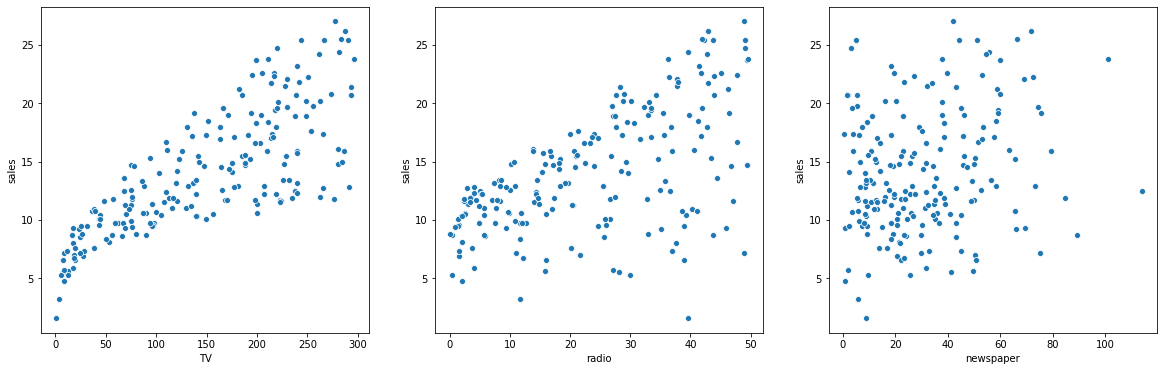

In [12]:
# 3개의 시각화를 한 화면에 배치합니다
figure,((ax1,ax2,ax3)) = plt.subplots(nrows=1,ncols=3)
# 시각화의 사이즈를 설정해줍니다
figure.set_size_inches(20,6)
# 미디어별 매체비 분포를 scatterplot으로 시각화해봅니다

sns.scatterplot(data= df,x= 'TV',y= 'sales',ax=ax1)
sns.scatterplot(data= df,x= 'radio',y= 'sales',ax=ax2)
sns.scatterplot(data= df,x= 'newspaper',y= 'sales',ax=ax3)

### 매출액과의 scatter plot을 보면,TV가 매출액과 가장 관련이 높은 것 같아보입니다.라디오도 관련이 있지만 신문의 상관관계는 애매해 보입니다.

# 선형회귀 분석(stats model)

In [13]:
# stats model의 ols를 사용하여 선형회귀분석을 합니다.
import statsmodels.formula.api as sm

In [14]:
model1 = sm.ols(formula= 'sales ~ TV +radio + newspaper',data= df).fit()

In [15]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        00:47:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

# **분석 결과 해석 : 잘 된 분석인가?어떻게 개선 가능한가?**

## 선형회귀 분석(sklearn)

In [16]:
# sklearn의 선형회귀분석 결과와도 같습니다.
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(features,Labels)
print(model.intercept_,model.coef_)

2.938889369459412 [ 0.04576465  0.18853002 -0.00103749]


In [17]:
# 변수의 포함여부에 따른 ols 결과를 봅니다.
model1 = model1 = sm.ols(formula= 'sales ~ TV +radio + newspaper',data= df).fit()
model2 = model1 = sm.ols(formula= 'sales ~ TV +radio',data= df).fit()
model3 = model1 = sm.ols(formula= 'sales ~ TV',data= df).fit()

print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        00:55:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

# 결과 해석
- 유의하지 않은 변수 newspaper를 제거한 model2의 AIC,BIC가 가장 낮습니다.
- 여러개의 모델 중 선택을 할 때 AIC,BIC가 가장 낮은지 여부로 정하기도 합니다.
- 물론 AIC,BIC가 유일한 판단기준은 아니고 RMSE,CFI 등 다른 기준들과 함께 고려되어야 합니다.
- 결과에 따르면 p-vlaue가 0.05 이상으로,신문광고는 매출액 예측에 있어서 변수의 유무가 통계적으로 유의한 차이를 보이지 않습니다.
- 즉 ,신문광고 마케팅과 매출액은 관련이 없다고 할 수 있습니다.

In [21]:
# 각 미디어별 매체비에 따른 sales를 예측해봅니다.
model1.predict({'TV':300,'radio':10,'newspaper':4})

0    21.293586
dtype: float64

In [22]:
model3.predict({'TV':300})

0    21.293586
dtype: float64

# 데이터 변환 후 재분석
- 신문광고가 유의미하지 않다고 나왔지만 데이터의 문제일 수도 있다는 생각이 들었습니다.
- 여러분이 2011년에 살고 있다고 가정하고,여러분의 상사는 여전히 신문광고가 유의미하다고 생각하고 있습니다.
- 분석결과에 대해 상사로부터 데이터 샘플수가 적거나 데이터 처리가 잘못되어서 이런 결과가 나온 것이 아니냐는 지적을 받았습니다.

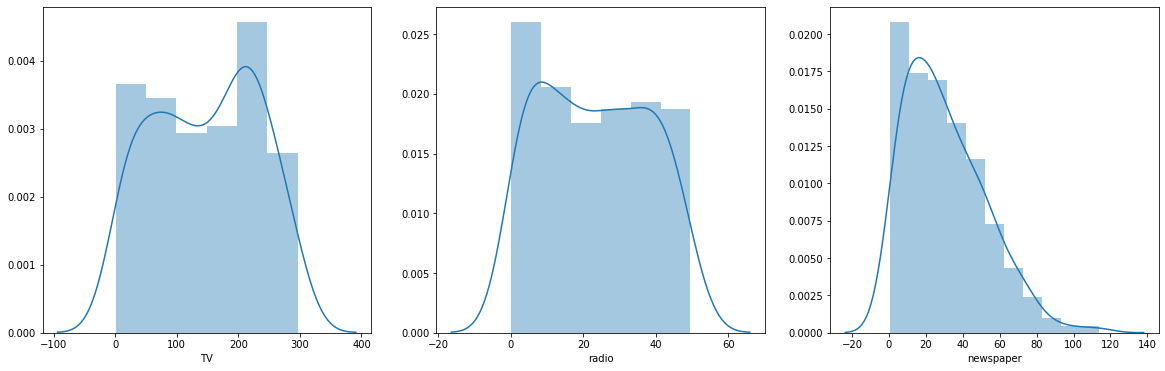

In [26]:
# 3개의 시각화를 한 화면에 배치합니다
figure,((ax1,ax2,ax3)) = plt.subplots(nrows=1,ncols=3)
# 시각화의 사이즈를 설정해줍니다
figure.set_size_inches(20,6)

# 미디어별 메체비 분포를 seaborn의 distplot으로 시각화해봅니다.
sns.distplot(df['TV'],ax=ax1)
sns.distplot(df['radio'],ax=ax2)
sns.distplot(df['newspaper'],ax=ax3)

In [29]:
# 데이터 분포를 보니 newspaper 값이 치우쳐 있습니다.
# 정규화를 위해 로그 변환을 해줍니다.
df['log_newspaper'] = np.log(df['newspaper']+1)

In [31]:
df[['log_newspaper','newspaper']]
print(df.shape)

(200, 5)


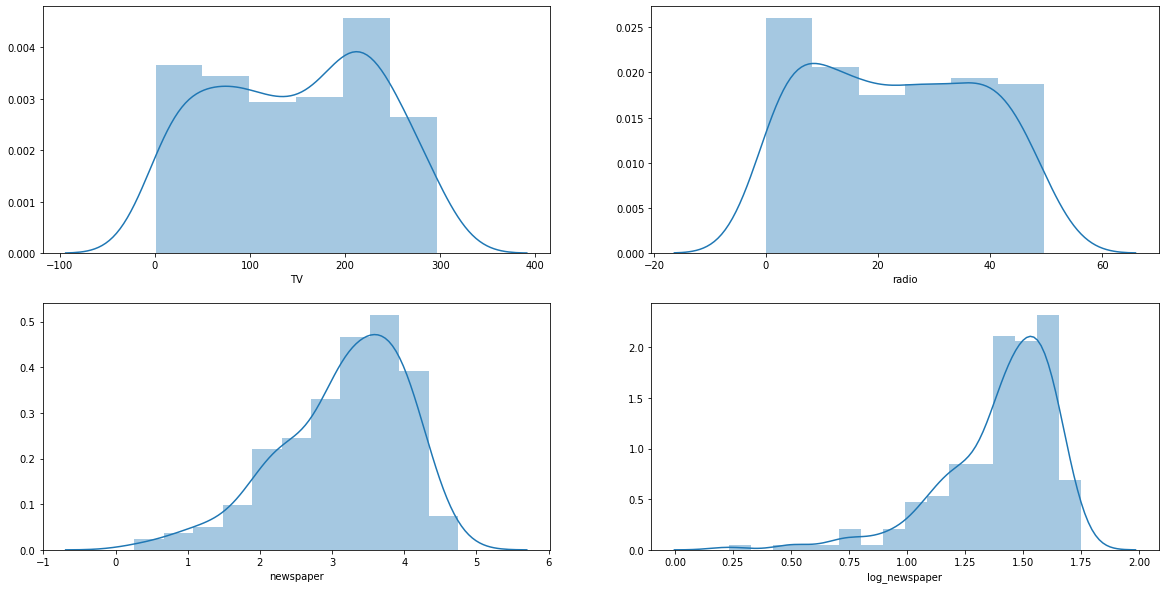

In [32]:
# 4개의 시각화를 한 화면에 배치합니다
figure,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
# 시각화의 사이즈를 설정해줍니다
figure.set_size_inches(20,10)

# 미디어별 메체비 분포를 seaborn의 distplot으로 시각화해봅니다.
sns.distplot(df['TV'],ax=ax1)
sns.distplot(df['radio'],ax=ax2)
sns.distplot(df['newspaper'],ax=ax3)
sns.distplot(df['log_newspaper'],ax=ax4)

In [33]:
# 변환한 newspaper변수 결과도 포함하여 ols 분석 결과를 봅니다.

model1 = sm.ols(formula= 'sales ~ TV +radio + newspaper',data= df).fit()

model4 = sm.ols(formula= 'sales ~ TV +radio + log_newspaper',data= df).fit()

print(model1.summary())
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.4
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.53e-96
Time:                        01:29:45   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8057      0.495      5.671      0.0